In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
import time

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
train_labels = pd.read_csv("train_labels_preprocessed.csv")
train_values = pd.read_csv("train_values_preprocessed.csv")

In [8]:
train_labels.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
train_labels.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [9]:
train_values.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,0.500000,0.357143,0.428571,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,0.166667,0.500000,0.714286,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,0.166667,0.285714,0.428571,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,0.166667,0.357143,0.428571,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,0.500000,0.500000,1.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels, test_size = 0.2, random_state = 42)

In [11]:
X_test.shape

(52121, 60)

In [12]:
X_train.shape

(208480, 60)

In [13]:
dt = KNeighborsClassifier(n_neighbors=10, metric="euclidean", n_jobs=4)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import distance_metrics
from scipy.stats import randint

dt_searched = KNeighborsClassifier()
param_distributions = {"n_neighbors": range(15), "metric": list(distance_metrics().keys())}


In [15]:
param_distributions

{'n_neighbors': range(0, 15),
 'metric': ['cityblock',
  'cosine',
  'euclidean',
  'haversine',
  'l2',
  'l1',
  'manhattan',
  'precomputed',
  'nan_euclidean']}

In [16]:
search = GridSearchCV(dt_searched, param_distributions, scoring="f1", n_jobs=-1).fit(X_train, y_train)


ValueError: X should be a square kernel matrix

In [17]:
search.best_params_  

NameError: name 'search' is not defined

In [ ]:
start_time = time.time()
model = dt.fit(X_train, y_train)
dt_time_fit = time.time() - start_time

c:\Users\ujvar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
start_time = time.time()
predictions_test = model.predict(X_test)
dt_time_pred = time.time() - start_time

In [ ]:
print(predictions_test)

[2 1 2 ... 2 3 2]


In [ ]:
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Precision: ", metrics.precision_score(y_test,predictions_test, average='micro'))
print("Recall: ", metrics.recall_score(y_test,predictions_test,average='micro'))
print("Accuracy: ", metrics.accuracy_score(y_test,predictions_test))
print("F1_score: ", metrics.f1_score(y_test,predictions_test, average='micro'))

Fit Time: 0.11173272132873535 seconds
Prediction Time: 15.842619895935059 seconds
Precision:  0.7242570173250705
Recall:  0.7242570173250705
Accuracy:  0.7242570173250705
F1_score:  0.7242570173250704


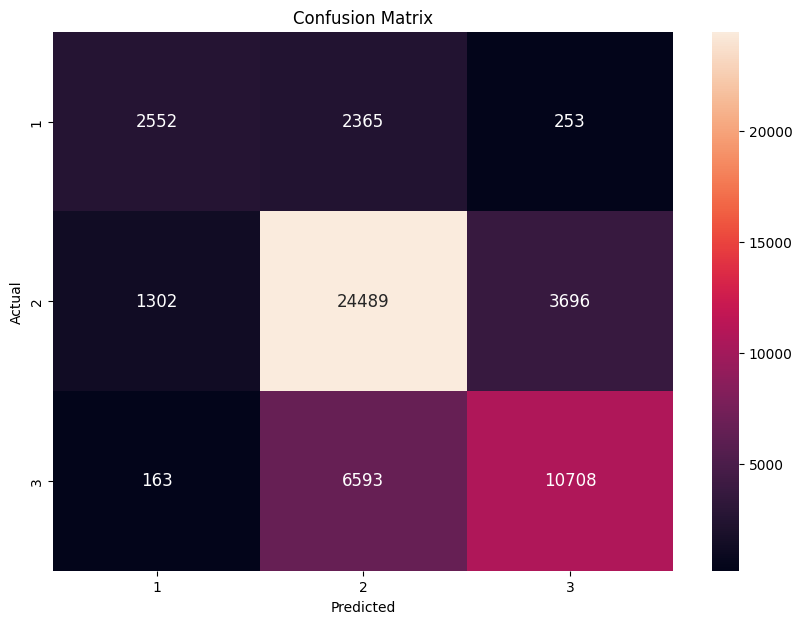

In [ ]:
data = confusion_matrix(y_test,predictions_test)
cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.show()